## Bitcoin data

##### coindesk / bitcoincharts / blockchain.info 

bitcoinaverage / okcoin / coinbase

In [1]:
import requests
import pandas as pd
import numpy as np
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
# pd.options.display.float_format = '{:,.2f}'.format

### Quandl / Blockchain.info

In [2]:
with open('data/quandl.json') as fi:
    q_data = json.load(fi)
    
data = q_data['data']
data.reverse()

df_q = pd.DataFrame.from_records(data, columns = q_data['column_names'])
df_q['Date'] = pd.to_datetime(df_q.Date)
df_q.set_index('Date', inplace = True)
df_q.columns = ['quandlClose']

### Coindesk

In [3]:
with open('data/coindesk.json') as fi:
    coin_data = json.load(fi)
    
df_coin = pd.DataFrame.from_dict(coin_data['bpi'], orient = "index")
df_coin.index = pd.to_datetime(df_coin.index)
df_coin.columns = ['coinClose']

### Bitcoincharts

In [4]:
charts = ['bitbay', 'bitkonan', 'bitstamp', 'hitbtc', 'itbit', 'kraken', 'localbtc', 'rock']

In [5]:
data = {}
labels = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume (BTC)', 'Volume (Currency)', 'Weighted Price']

for index, chart in enumerate(charts): 
    exec("with open('data/{}.json') as fi: data[chart] = json.load(fi)".format(chart)) 
    exec("df{} = pd.DataFrame.from_records(data[chart], columns = labels)".format(index))
    exec("df{}['Date'] = pd.to_datetime(df{}['Timestamp'], unit = 's')".format(index, index))
    exec("df{}.set_index('Date', inplace = True)".format(index))
    exec("df{}.drop('Timestamp', 1, inplace = True)".format(index))
    exec("df{} = df{}.replace(1.7e+308, np.nan)".format(index, index))

In [6]:
for i in range(0,8):
    exec("print(df{}.index[0])".format(i))

2014-05-16 00:00:00
2013-07-02 00:00:00
2011-09-13 00:00:00
2013-12-27 00:00:00
2013-08-25 00:00:00
2014-01-07 00:00:00
2013-03-11 00:00:00
2011-11-12 00:00:00


***

In [7]:
charts = ['bitbay', 'bitkonan', 'bitstamp', 'hitbtc', 'itbit', 'kraken', 'localbtc', 'rock']
labels = ['open', 'high', 'low', 'close', 'vol_btc', 'vol_cur', 'wprice']

for index, label in enumerate(labels):
    exec("df_charts_{} = pd.concat([df0.iloc[:,index], df1.iloc[:,index], df2.iloc[:,index], df3.iloc[:,index],\
    df4.iloc[:,index], df5.iloc[:,index], df6.iloc[:,index], df7.iloc[:,index]], axis = 1)".format(label))
    exec("df_charts_{}.columns = charts + df_charts_{}.columns".format(label, label))

In [8]:
df2.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2011-09-13,5.80,6.00,5.65,5.97,58.371382,346.097389,5.929231
2011-09-14,5.58,5.72,5.52,5.53,61.145984,341.854813,5.590798
2011-09-15,5.12,5.24,5.00,5.13,80.140795,408.259002,5.094272
2011-09-16,4.82,4.87,4.80,4.85,39.914007,193.763147,4.854515
2011-09-17,4.87,4.87,4.87,4.87,0.300000,1.461000,4.870000


***

#### Plotting

In [9]:
plt.figure(figsize = (8, 6))
sns.set_style("whitegrid", {'axes.linewidth': 2.50})
sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth": 2.5})
# context = talk
# plt.savefig('test.png', dpi = 50)

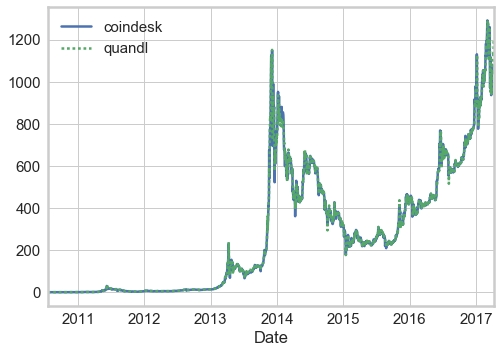

In [10]:
df_coin.coinClose.plot(style = '-')
df_q.quandlClose.ix['2010-07-18':].plot(style = ':')
plt.legend(['coindesk', 'quandl'], loc = 'upper left')

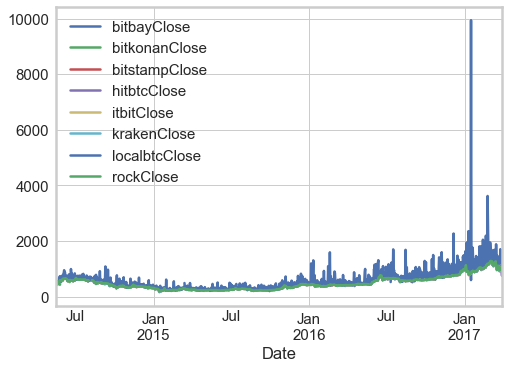

In [11]:
df_charts_close.ix['2014-05-16':'2017-03-31'].plot()

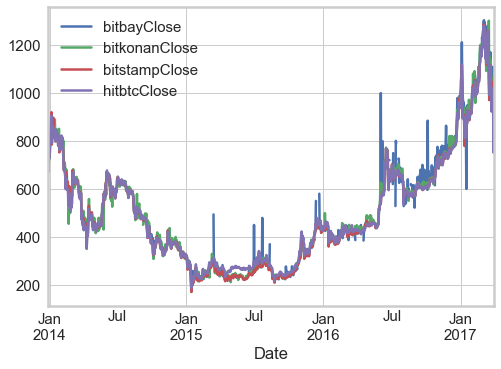

In [12]:
df_charts_close.ix['2013-12-27':'2017-03-31'].iloc[:,0:4].plot()

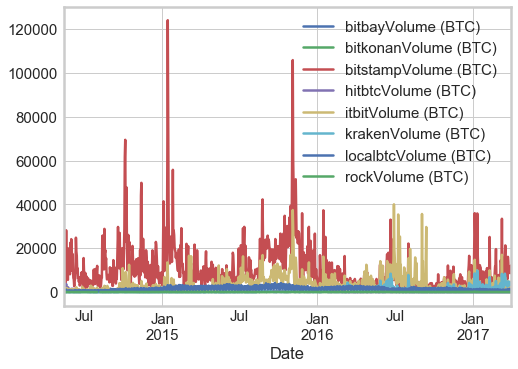

In [13]:
df_charts_vol_btc.ix['2014-05-16':'2017-03-31'].plot()

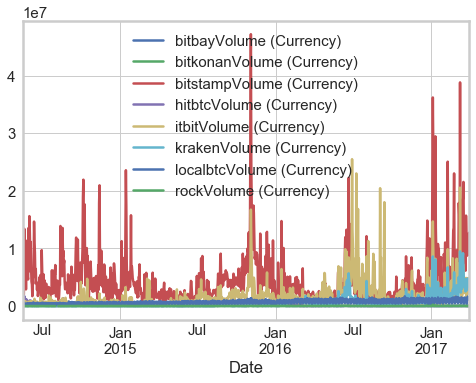

In [14]:
df_charts_vol_cur.ix['2014-05-16':'2017-03-31'].plot()

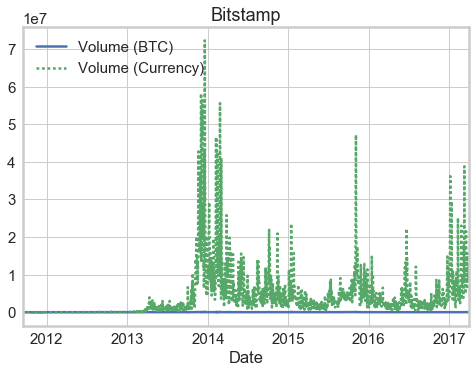

In [15]:
df_charts_vol_btc['bitstampVolume (BTC)'].ix['2011-09-13':'2017-03-31'].plot(style = '-')
df_charts_vol_cur['bitstampVolume (Currency)'].ix['2011-09-13':'2017-03-31'].plot(style = ':')
plt.legend(['Volume (BTC)', 'Volume (Currency)'], loc = 'upper left')
plt.title('Bitstamp')

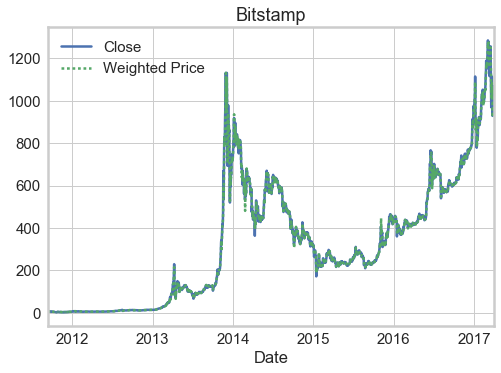

In [16]:
df_charts_close['bitstampClose'].ix['2011-09-13':'2017-03-31'].plot(style = '-')
df_charts_wprice['bitstampWeighted Price'].ix['2011-09-13':'2017-03-31'].plot(style = ':')
plt.legend(['Close', 'Weighted Price'], loc = 'upper left')
plt.title('Bitstamp')